\title{Shooting Method for BVPs}
\author{Members of Group1: Peniel, Alice, Richard, Scott, Delchere}
\maketitle

\section{Introduction}

The **shooting methods** are developed with the goal of transforming the ODE boundary value problems to an equivalent initial value problems, then we can solve it using the methods we learned from the previous chapter. In the initial value problems, we can start at the initial value and march forward to get the solution. But this method is not working for the boundary value problems, because there are not enough initial value conditions to solve the ODE to get a unique solution. Therefore, the shooting methods was developed to overcome this difficulty. \\
The name of the shooting method is derived from analogy with the target shooting: as shown in the above figure, we shoot the target and observe where it hits the target, based on the errors, we can adjust our aim and shoot again in the hope that it will hit close to the target. We can see from the analogy that the shooting method is an iterative method.  


Let's see how the shooting methods works using the second-order ODE given $f(a) = f_a$ and $f(b) = f_b$

$$
F\left(x, f(x), \frac{df(x)}{dx}\right) = \frac{d^{2}f(x)}{dx^{2}}
$$

**Step 1:** We start the whole process by guessing $f'(a)=\alpha$, together with $f(a) = f_a$, we turn the above problem into an initial value problem with two conditions all on value $x=a$. This is the **aim** step.   

**Step 2:** Using what we learned from previous chapter, i.e. we can use Runge-Kutta method, to integrate to the other boundary $b$ to find $f(b) = f_\beta$. This is the **shooting** step.  

**Step 3:** Now we compare the value of $f_\beta$ with $f_b$, usually our initial guess is not good, and $f_\beta \ne f_b$, but what we want is $f_\beta - f_b = 0$, therefore, we adjust our initial guesses and repeat. Until the error is acceptable, we can stop. This is the iterative step. 

We can see that the ideas behind the shooting methods is very simple. But the comparing and finding the best guesses are not easy, this procedure is very tedious. But essentially, finding the best guess to get $f_\beta - f_b = 0$ is a root-finding problem, once we realize this, we have a systematic way to search for the best guess. Since $f_\beta$ is a function of $\alpha$, therefore, the problem becomes finding the root of $g(\alpha) - f_b = 0 $. We can use any methods from chapter 19 to solve it.  

**TRY IT!** We are going out to launch a rocket, and let $y(t)$ is the altitude (meters from the surface) of the rocket at time t. What should be the value of $y'(0)$ such that we will $y(1)=0$ ? 

To answer this question, we can frame the problem into a boundary value problem for a second-order ODE. The ODE is: 

$$ \frac{d^2y}{dt^2} = -\lambda \exp{(y)}$$

with the two boundary conditions are: $y(0) =y(1) = 0$. And we want to answer the question, what's the $y'(0)$ at the launching? 

This is a quite simple question, we can solve it analytically easily, with the correct answer $y'(0) = 34.5$. Now let's solve it using the shooting method. First, we will reduce the order of the function, the second-order ODE becomes:

$$ \frac{dy}{dt} = v$$

$$ \frac{dv}{dt} = -\lambda \exp{(y)}$$

Therefore, we have 
$$
\frac{d}{dt}\left[\begin{array}{c} y(t) \\ z(t) \end{array}\right]= \left[\begin{array}{c} z(t) \\-\lambda \exp y(t) \end{array}\right].
$$

\section{Programming part}

\subsection{Arbitrary initial Guesses}

Let's start our first guess, we guess the $y'(0)=1.$ and $\lambda=1$. SO our equation is 
$$
\frac{d}{dt}\left[\begin{array}{c} y(t) \\ z(t) \end{array}\right]= \left[\begin{array}{c} z(t) \\-\lambda \exp y(t) \end{array}\right].
$$

In [1]:
def Shoot_asIVP1(lam, z0):
    """ 
    Solves and plots the solutiion y(t) of the system: 
    y'(t)=z
    z'(t)=-lam*exp(y(t))
    y(0)=y(1)=0
    using arbitrary initial guess
    """
    import numpy as np
    import matplotlib.pyplot as plt
    from scipy.integrate import solve_ivp
    plt.style.use('seaborn-poster')
    %matplotlib inline
    
    F = lambda t, s: \
    np.array([s[1], -lam*np.exp(s[0])])

    t_eval = np.linspace(0, 1, 51)

    sol = solve_ivp(F, [0, 1], \
                [y0, z0], t_eval = t_eval)
    
    for z0_guess in range(1, 100, 10):
        v0, = fsolve(objective, z0_guess)
        print('Initial guess by the user: %2d, Result: %3.1f' \
          % (z0_guess, z0))
        
    plt.figure(figsize = (10, 8))
    plt.plot(sol.t, sol.y[0])
    plt.plot(1, 0, 'ro')
    plt.grid(True)
    plt.xlabel('x')
    plt.ylabel('y(x)')
    plt.title(f'first guess z0={z0}')
    plt.savefig(Fr)
    plt.show()       

In [2]:
Shoot_asIVP1(1.0, 1.)

NameError: name 'y0' is not defined

In [195]:
###### COmments

In [ ]:
### Secong guess

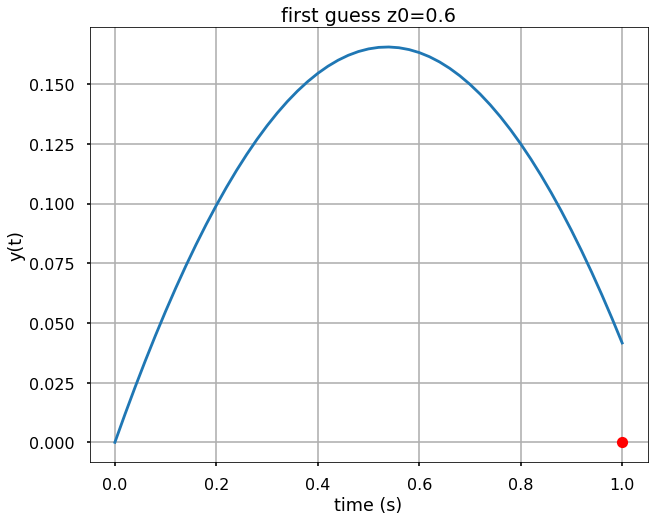

In [209]:
Shoot_asIVP1(1.0, 0.6)

In [199]:
### COmmment 


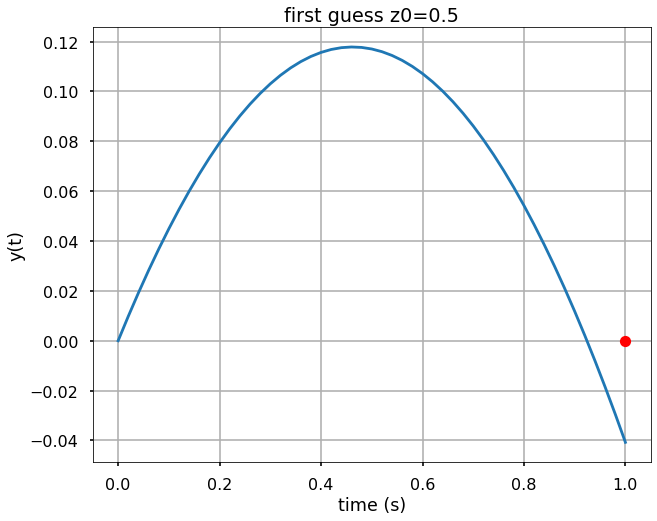

In [210]:
Shoot_asIVP1(1.0, 0.5)

In [ ]:
#### Comments 

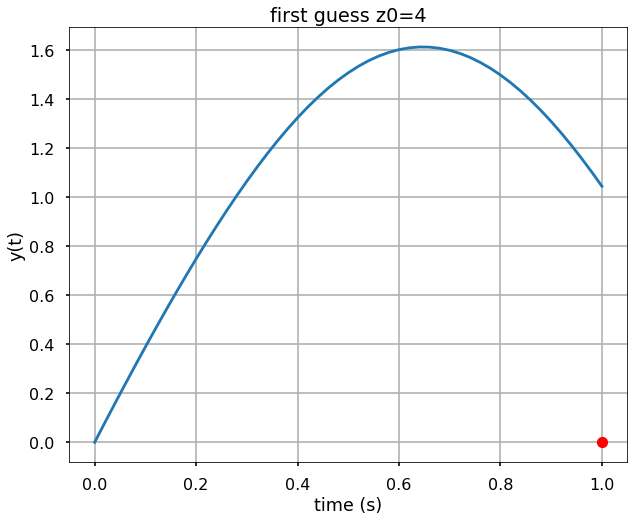

In [211]:
Shoot_asIVP1(2.0,4)

## Solving with objective function computing the good initial guesses

In [241]:
def Shoot_asIVP2(lam):
    """ 
    Solves and plots the solutiion y(t) of the system: 
    y'(t)=z
    z'(t)=-lam*exp(y(t))
    y(0)=y(1)=0
    using the good initial guesses
    """
    # Importing the libraries
    import numpy as np
    import matplotlib.pyplot as plt
    from scipy.integrate import solve_ivp
    plt.style.use('seaborn-poster')
    %matplotlib inline
    
    # Definition of the right-hand-side of the system of equations
    
    F = lambda t, s: \
    np.array([s[1], -lam*np.exp(s[0])])

    # Times at which the solution will be evaluated with 51 equidistant points
    t_eval = np.linspace(0, 1, 51)

    # Library to solve the root-equation
    from scipy.optimize import fsolve

    # A function that takes at least one (possibly vector) argument,
    # and returns a value of the same length.
    def objective(z0):
        sol = solve_ivp(F, [0, 1], \
            [y0, z0], t_eval = t_eval)
        y = np.asarray(sol.y[0])
        return y[-1]
    
    # Findings the roots of the root-equation 
    z01, = fsolve(objective, 2)
    z02, = fsolve(objective, 10)
    z01 = np.asarray(z01,dtype=object)
    z02 = np.asarray(z02,dtype=object)
    
    # Solving our IVP with the two guesses
    
    sol1 = solve_ivp(F, [0, 1], \
            [y0, z01], t_eval = t_eval)

    sol2 = solve_ivp(F, [0, 1], \
            [y0, z02], t_eval = t_eval)
    
    for z0_guess in range(1, 100, 10):
        z0, = fsolve(objective, z0_guess)
        print('Initial guess by the user: %2d, Result: %3.1f' \
          % (z0_guess, z0))
    
    # Plotting our solutions
    plt.figure(figsize = (10, 8))
    plt.plot(sol1.t, sol1.y[0], label='Small solution')
    plt.plot(sol2.t, sol2.y[0], label='Large solution')
    plt.plot(1, 0, 'ro')
    plt.grid(True)
    plt.xlabel('t')
    plt.ylabel('y(t)')
    plt.title(f'root findings z01={z01} and z02={z02}, \lambda={lam}')
    plt.legend()
    plt.show()  

/home/peniel98/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Initial guess by the user:  1, Result: 0.5
Initial guess by the user: 11, Result: 10.9
Initial guess by the user: 21, Result: 10.9
Initial guess by the user: 31, Result: 10.9
Initial guess by the user: 41, Result: 10.9
Initial guess by the user: 51, Result: 10.9
Initial guess by the user: 61, Result: 10.9
Initial guess by the user: 71, Result: 10.9
Initial guess by the user: 81, Result: 10.9
Initial guess by the user: 91, Result: 10.9


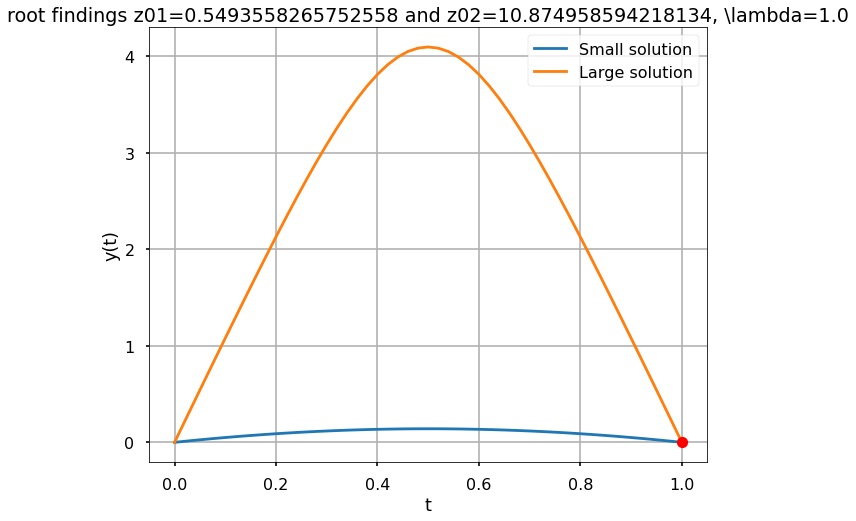

In [242]:
Shoot_asIVP2(1.0)

In [ ]:
#### Comments

/home/peniel98/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Init:  1, Result: 1.2
Init: 11, Result: 8.3
Init: 21, Result: 8.3
Init: 31, Result: 8.3
Init: 41, Result: 8.3
Init: 51, Result: 8.3
Init: 61, Result: 8.3
Init: 71, Result: 8.3
Init: 81, Result: 8.3
Init: 91, Result: 8.3


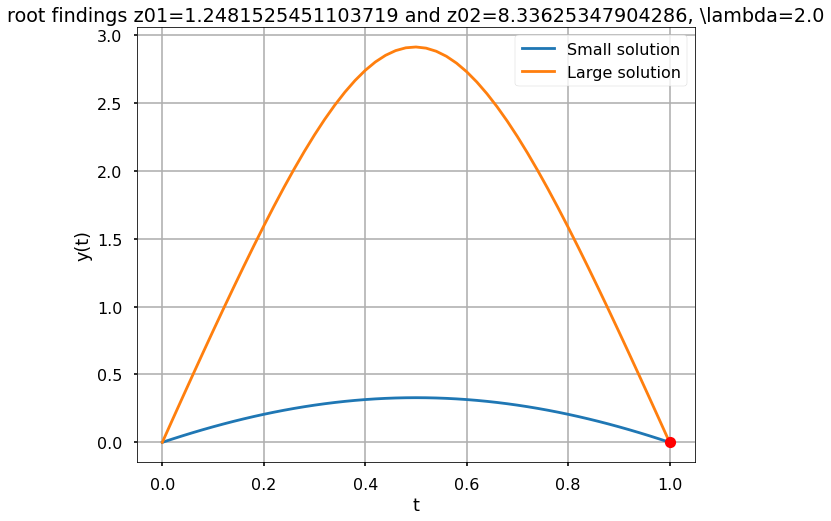

In [238]:
Shoot_asIVP2(2.0)

In [226]:
#### Comments 

The small initial guess is z01=2.3182276225455714 and the large one is z01=6.128994811870324


/home/peniel98/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


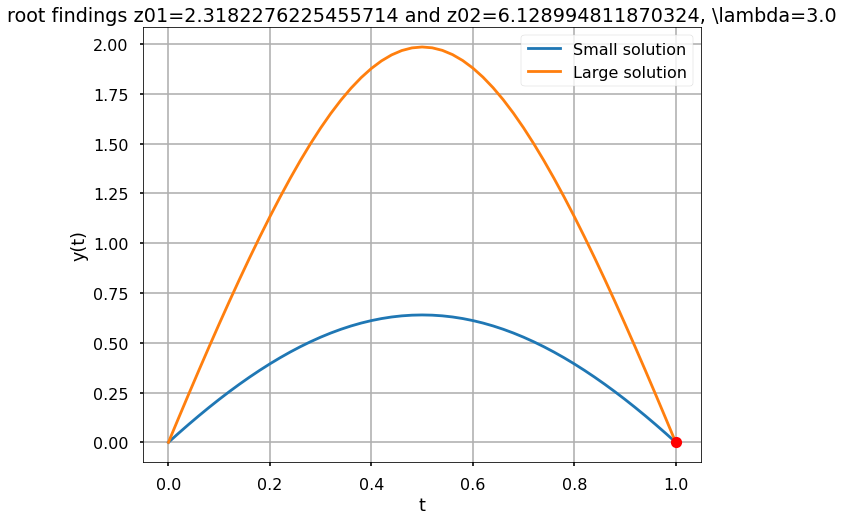

In [229]:
Shoot_asIVP2(3.)

In [ ]:
#### COde 

/home/peniel98/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


The small initial guess is z01=3.6329438345999483 and the large one is z01=4.468644691541316


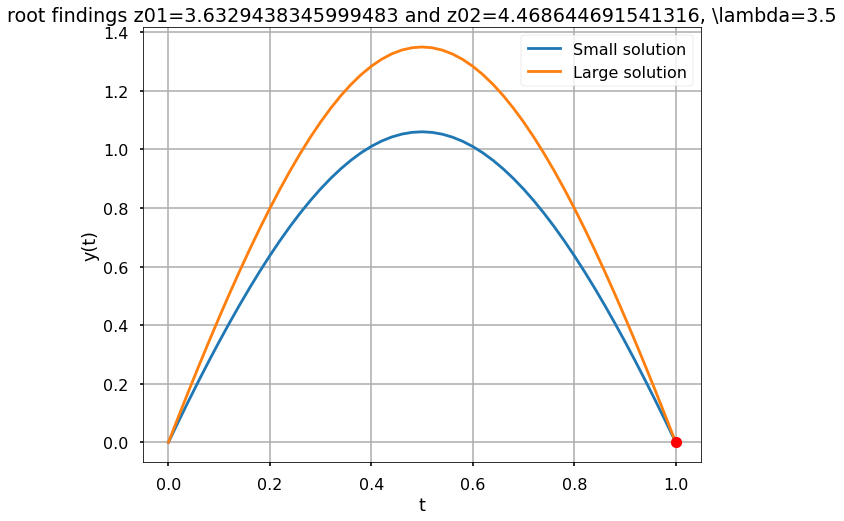

In [232]:
Shoot_asIVP2(3.5)

/home/peniel98/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/home/peniel98/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/home/peniel98/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


Init:  1, Result: 4.0
Init: 11, Result: 4.0
Init: 21, Result: 4.1
Init: 31, Result: 4.0
Init: 41, Result: 4.0
Init: 51, Result: 4.1
Init: 61, Result: 4.0
Init: 71, Result: 4.0
Init: 81, Result: 4.0
Init: 91, Result: 4.0


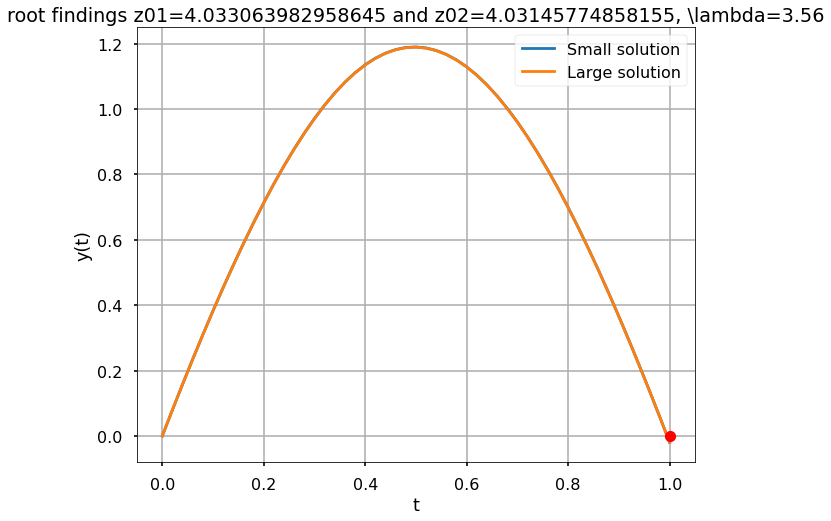

In [239]:
Shoot_asIVP2(3.56)

In [ ]:
### COmments 